In [ ]:
#----------------------------ASSIGNMENT-10---------------------------!

In [ ]:
#------------------------ASSOCIATION RULES---------------------------!

In [17]:
# Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the dataset
df = pd.read_excel("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Association Rules\\Online retail.xlsx",sheet_name="Sheet1")
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [69]:
! pip install apyori


In [19]:
#Assign column names manually
df.columns = ['Items']  # Assuming the transactions are in the first column

In [21]:
# Display the first few rows to confirm the change
df.head()

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [23]:
# Calculate the number of items per transaction
df['Num_Items'] = df['Items'].apply(lambda x: len(x.split(',')))

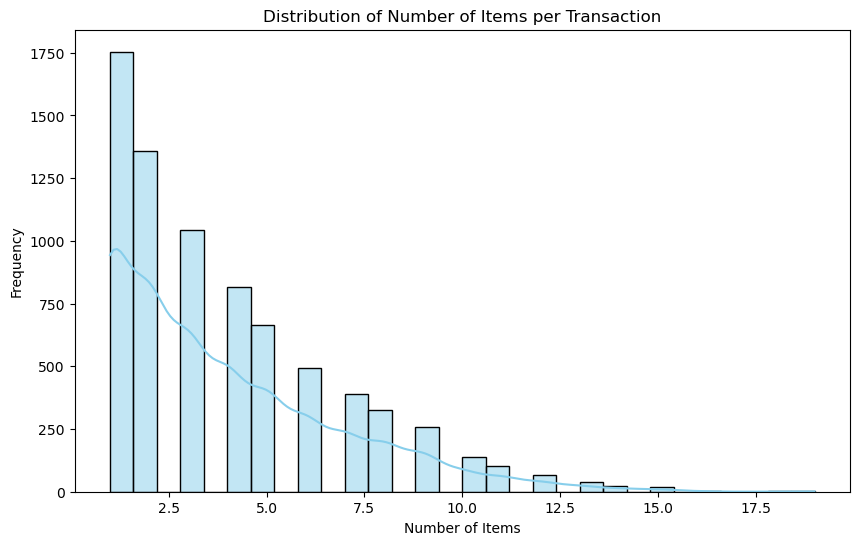

In [25]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_Items'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Number of Items per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Check for missing values
df.isnull().sum()

Items        0
Num_Items    0
dtype: int64

In [31]:
#Drop missing values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [33]:
# Convert each transaction to a list of items
transactions = df['Items'].apply(lambda x: x.split(',')).tolist()

In [35]:
# Initialize the Transaction Encoder
encoder = TransactionEncoder()

# Transform the data into a one-hot encoded DataFrame
encoded_data = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

In [37]:
frequent_itemsets = apriori(encoded_df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.113816,(burgers)
1,0.103575,(cake)
2,0.054879,(champagne)
3,0.083865,(chicken)
4,0.205217,(chocolate)
5,0.060676,(cookies)
6,0.071884,(cooking oil)
7,0.208116,(eggs)
8,0.083865,(escalope)
9,0.192657,(french fries)


In [39]:
# Calculate the number of itemsets
num_itemsets = len(frequent_itemsets)

In [41]:
# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.299710,0.205217,0.073237,0.244358,1.190730,1.0,0.011731,1.051798,0.228732,0.169651,0.049248,0.300616
1,(chocolate),(mineral water),0.205217,0.299710,0.073237,0.356874,1.190730,1.0,0.011731,1.088884,0.201538,0.169651,0.081629,0.300616
2,(spaghetti),(chocolate),0.229565,0.205217,0.055845,0.243266,1.185406,1.0,0.008735,1.050280,0.203012,0.147374,0.047873,0.257697
3,(chocolate),(spaghetti),0.205217,0.229565,0.055845,0.272128,1.185406,1.0,0.008735,1.058476,0.196793,0.147374,0.055245,0.257697
4,(eggs),(mineral water),0.208116,0.299710,0.070145,0.337047,1.124578,1.0,0.007770,1.056320,0.139891,0.160265,0.053317,0.285545
5,(mineral water),(eggs),0.299710,0.208116,0.070145,0.234043,1.124578,1.0,0.007770,1.033849,0.158188,0.160265,0.032740,0.285545
6,(spaghetti),(eggs),0.229565,0.208116,0.051401,0.223906,1.075870,1.0,0.003625,1.020345,0.091532,0.133067,0.019940,0.235444
7,(eggs),(spaghetti),0.208116,0.229565,0.051401,0.246982,1.075870,1.0,0.003625,1.023130,0.089053,0.133067,0.022607,0.235444
8,(frozen vegetables),(mineral water),0.129855,0.299710,0.050435,0.388393,1.295895,1.0,0.011516,1.144999,0.262407,0.133028,0.126637,0.278336
9,(mineral water),(frozen vegetables),0.299710,0.129855,0.050435,0.168279,1.295895,1.0,0.011516,1.046198,0.326054,0.133028,0.044158,0.278336


In [43]:
# Filter rules with high confidence and lift
strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 2)]
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


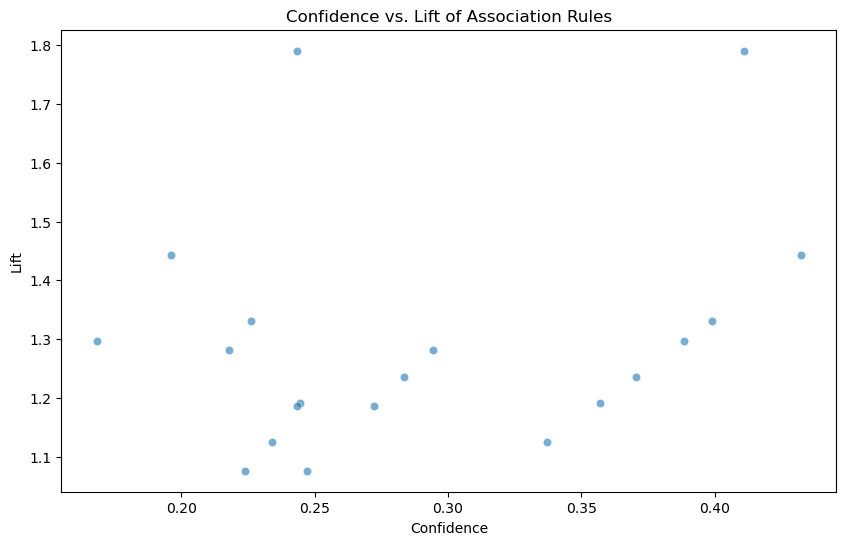

In [45]:
# Scatter plot of confidence vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', alpha=0.6)
plt.title('Confidence vs. Lift of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

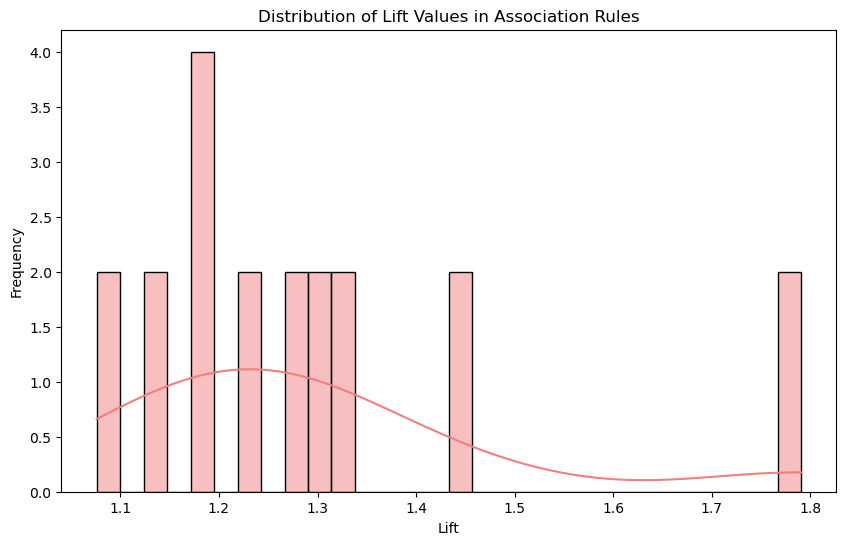

In [47]:
# Histogram of lift values
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Lift Values in Association Rules')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

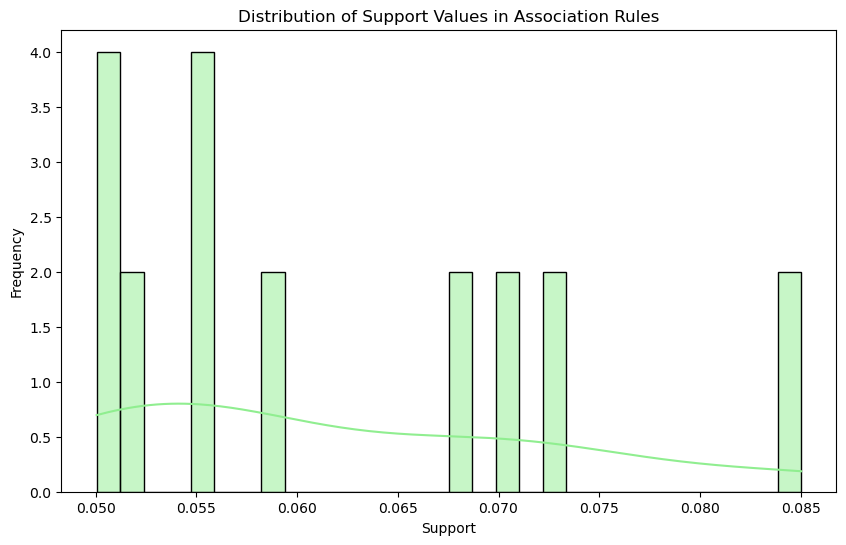

In [49]:
# Histogram of support values
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Support Values in Association Rules')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()


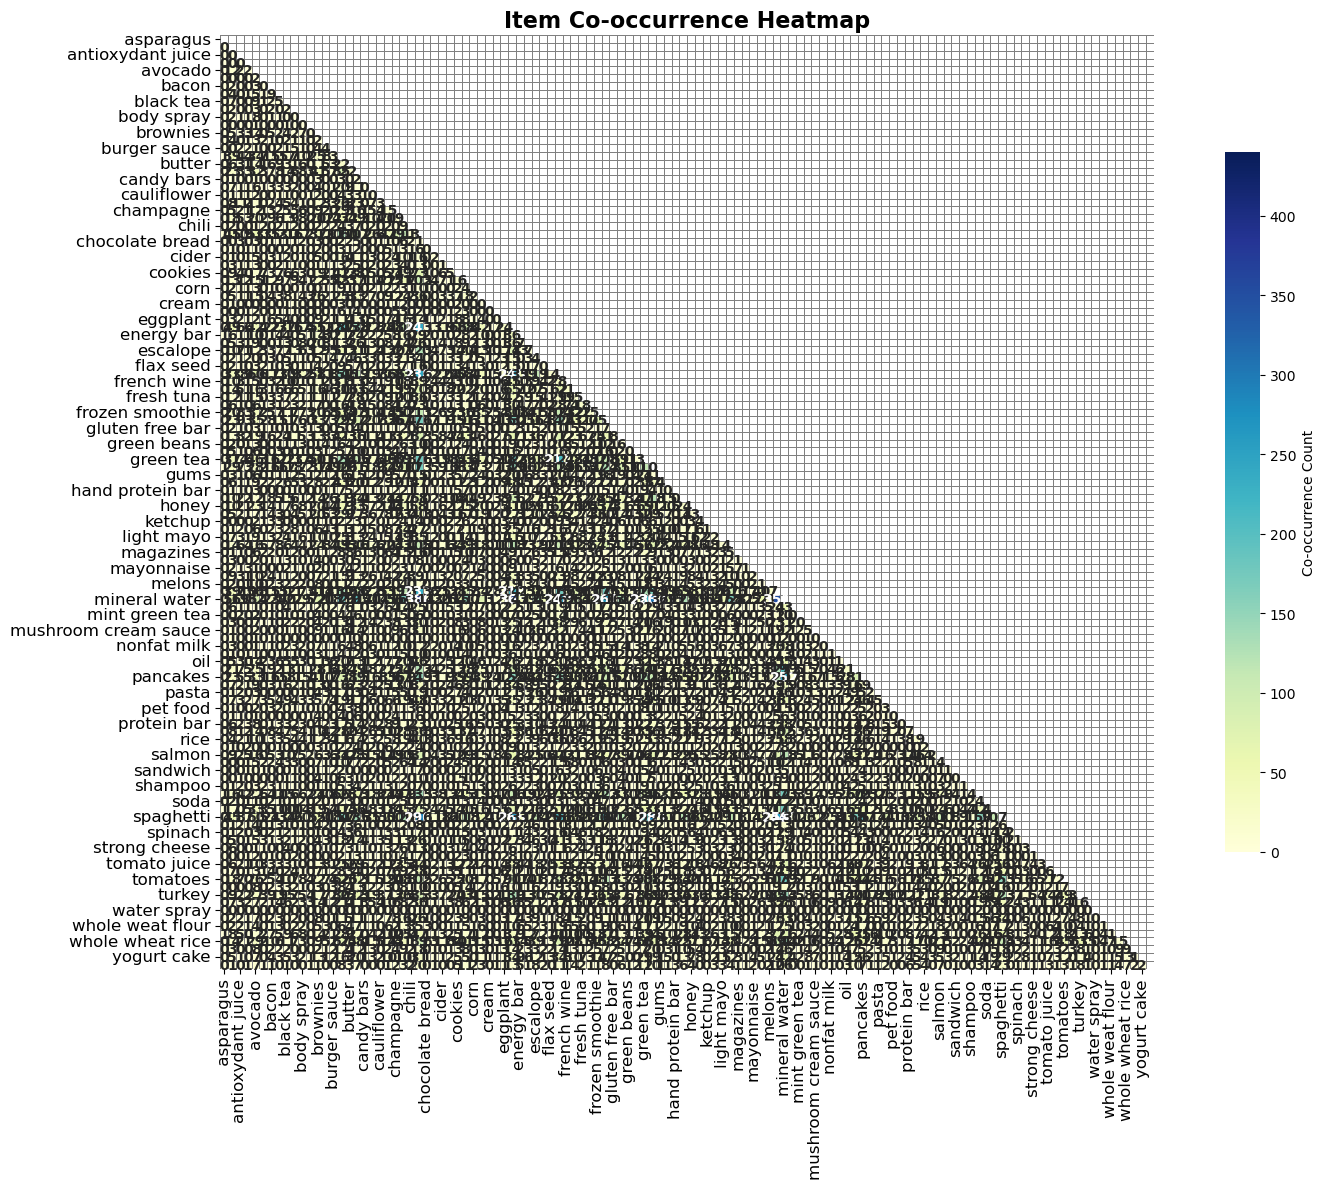

In [51]:
import numpy as np
# Create a co-occurrence matrix for items
co_occurrence = pd.DataFrame(0, index=encoder.columns_, columns=encoder.columns_)

for transaction in transactions:
    for item in transaction:
        for other_item in transaction:
            if item != other_item:
                co_occurrence.at[item, other_item] += 1

# Mask the upper triangle of the matrix (optional, for cleaner visualization)
mask = np.triu(np.ones_like(co_occurrence, dtype=bool))

# Set the plot size
plt.figure(figsize=(16, 12))

# Create the heatmap with improved style
sns.heatmap(co_occurrence,
            cmap='YlGnBu',  
            annot=True,
            fmt='d',  
            annot_kws={'size': 10, 'weight': 'bold'},
            cbar=True,  
            mask=mask,  
            square=True,  
            linewidths=0.5, 
            linecolor='gray', 
            cbar_kws={'shrink': 0.75, 'label': 'Co-occurrence Count'},  
            vmin=0, vmax=co_occurrence.values.max())  

# Rotate item labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Title and labels
plt.title('Item Co-occurrence Heatmap', fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
# Top N strongest rules by lift
top_n = 10
top_rules = rules.nlargest(top_n, 'lift')

C:\Users\Ashish\AppData\Local\Temp\ipykernel_22448\984074568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


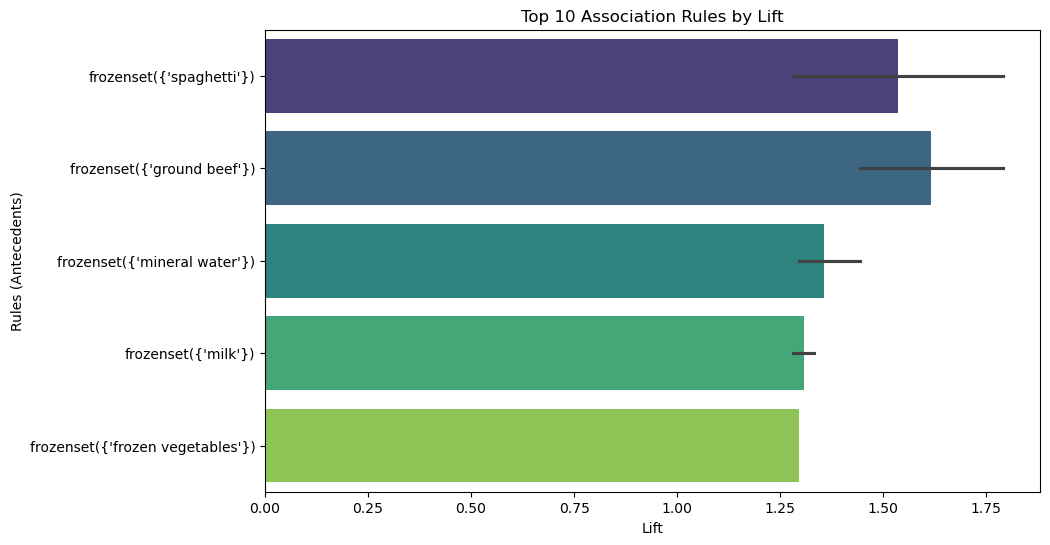

In [55]:
# Plot the top rules by lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')
plt.title(f'Top {top_n} Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules (Antecedents)')
plt.show()

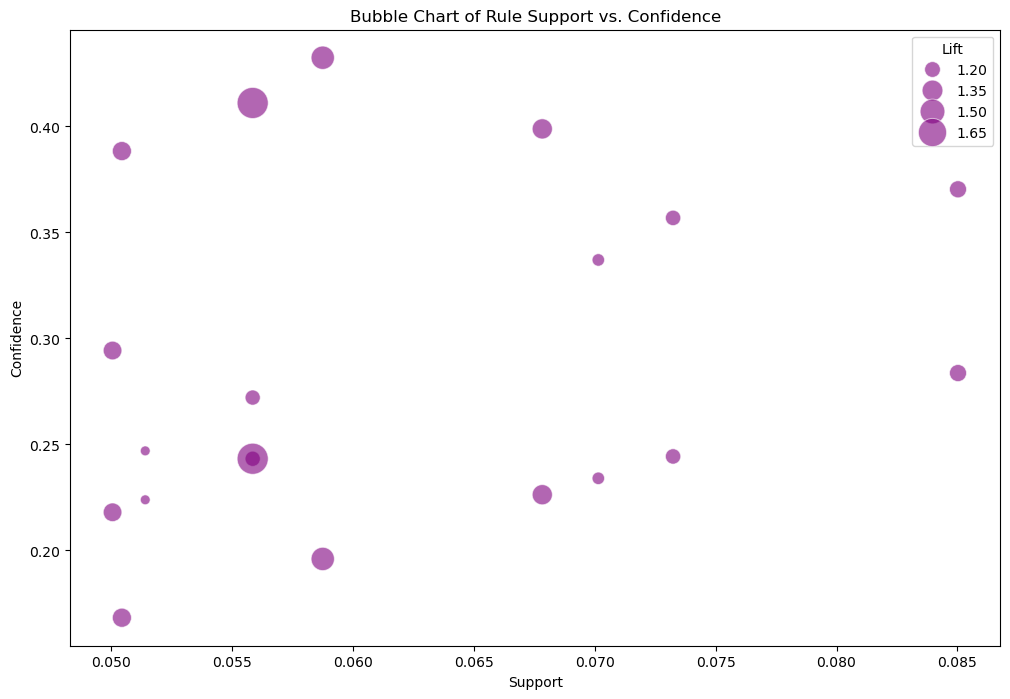

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(50, 500), color='purple', alpha=0.6)
plt.title('Bubble Chart of Rule Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

In [59]:
from sklearn.cluster import KMeans

# Create a DataFrame with itemsets (1s and 0s for purchased or not)
kmeans_data = encoded_df.sum(axis=0).to_frame().reset_index()
kmeans_data.columns = ['Item', 'Count']

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_data['Cluster'] = kmeans.fit_predict(kmeans_data[['Count']])

C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


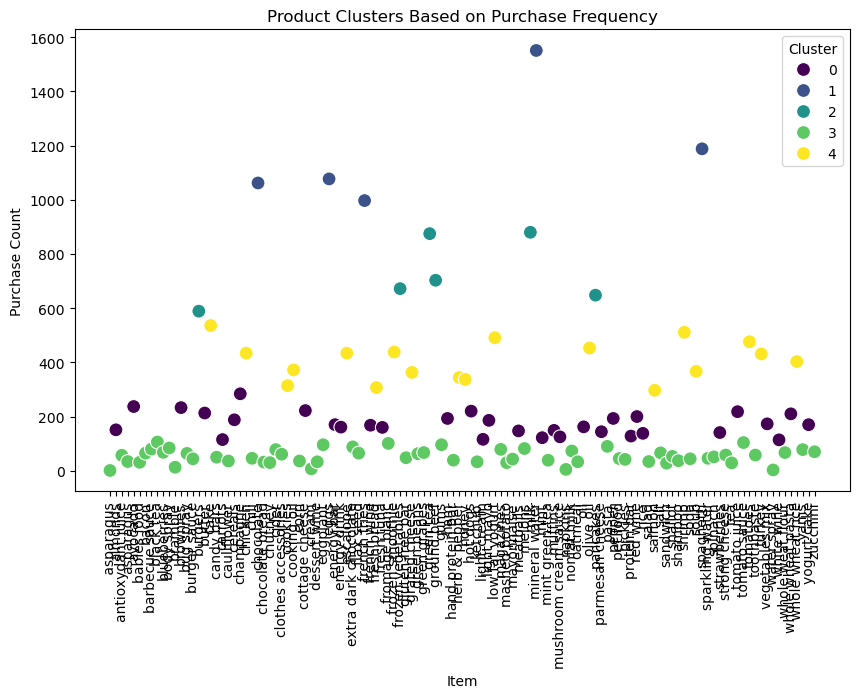

In [61]:
#Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kmeans_data, x='Item', y='Count', hue='Cluster', palette='viridis', s=100)
plt.title('Product Clusters Based on Purchase Frequency')
plt.xlabel('Item')
plt.ylabel('Purchase Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Select top N items with the highest purchase counts
top_items = encoded_df.sum(axis=0).sort_values(ascending=False).head(10).index

# Subset the dataset for the top N items
subset = encoded_df[top_items]

# Plot pairplot for the subset
sns.pairplot(subset, kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Most Frequently Purchased Products', y=1.02)
plt.show()

In [63]:
# Select top N items with the highest purchase counts
top_items = encoded_df.sum(axis=0).sort_values(ascending=False).head(10).index

In [65]:
# Subset the dataset for the top N items
subset = encoded_df[top_items]

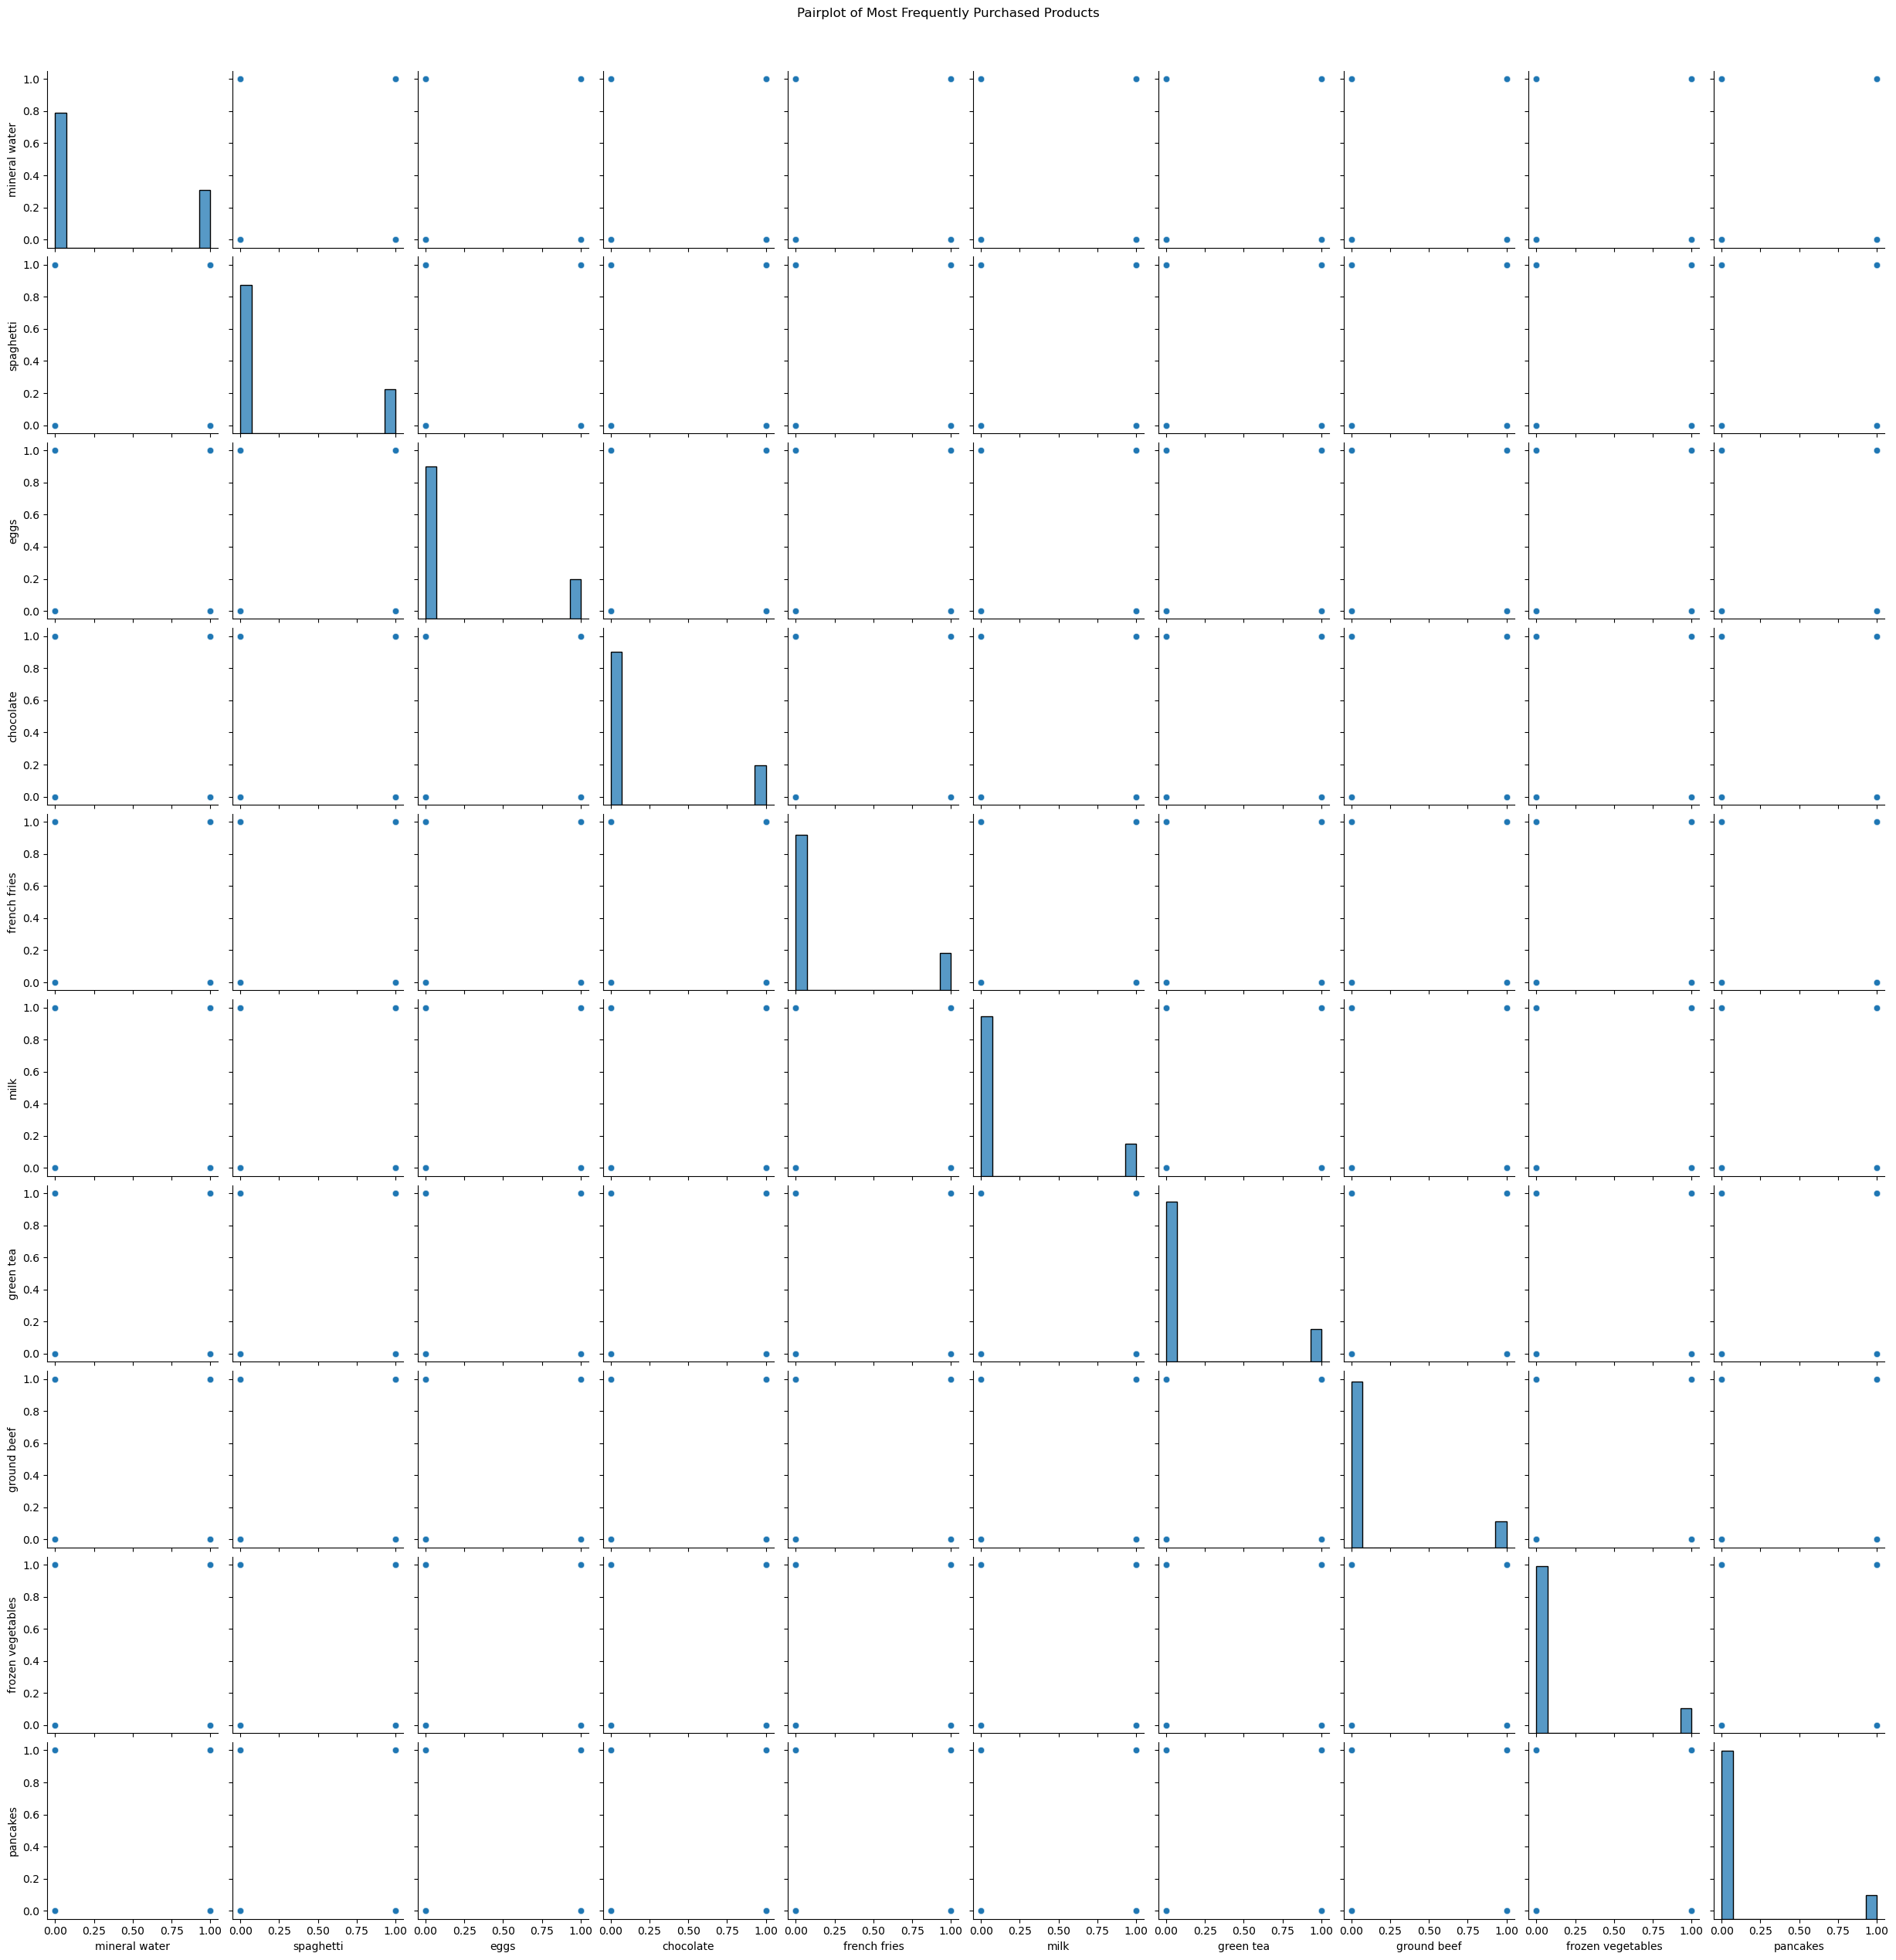

In [67]:
# Plot pairplot for the subset
sns.pairplot(subset, kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Most Frequently Purchased Products', y=1.02)
plt.show()

In [ ]:
#Analysis and Interpretation

We can learn a lot about how customers browse and what products they frequently purchase together from the association rules produced by the Apriori Algorithm. 
Let's examine the significance of these findings and how they can improve our comprehension of consumer purchase patterns.
A rule such as this is represented by each row in the results:

**Antecedent → Consequent**

Antecedent: The item or items that a consumer purchases initially("if").
Consequent: The item or items that a consumer purchases later("then").
Support: This indicates the frequency with which the antecedent and consequent are purchased together.
Confidence: This indicates the probability that a buyer of the antecedent will purchase the consequent as well.
Lift: This gauges how strongly the antecedent and consequent are related.
The likelihood of the two things being purchased together is higher than chance when the lift value is greater than 1.

In [ ]:
#Key Insights from the Results
Popular Product Combinations From the rules, we can see the following items are frequently bought together:

Mineral Water → Chocolate: Customers enjoy pairing water with a treat.
Spaghetti → Chocolate: Suggests combining meal and dessert in shopping.
Ground Beef → Mineral Water: Indicates meal-prep needs with drinks.
Milk → Mineral Water: Highlights essential household purchases.
Spaghetti → Eggs: Reflects diverse meal preparation.
Frozen Vegetables → Mineral Water: Suggests health-conscious shopping.




In [ ]:
#Business Consequences and Suggestions

Bundling Products
Retailers may consider providing customers with product bundles based on the knowledge gained from these regulations. Here are some suggestions:

Example of a Bundle: Combine chocolate with mineral water and promote it as a "refreshing treat."

Example 2 of a Bundle: Present ground beef and mineral water as a "meal starter pack."

Bundle Example 3: Present eggs and spaghetti as a simple and quick meal combo.

Specific Promotions
These association guidelines can also be used by retailers to generate customized offers:

For instance, a consumer purchasing spaghetti might be eligible for a discount on eggs or chocolate.
Or, as part of a "healthy essentials" offer, marketing could draw attention to complementary goods like milk and mineral water, enticing consumers to purchase both.

Enhancement of Store Layout
Stores could group related things together based on these correlations. For example, placing eggs and spaghetti in the same aisle may persuade people to purchase both at the same time.
Forecasting Upcoming Purchases

Retailers can forecast future purchasing behavior by comprehending these trends. For example, a consumer who purchases spaghetti is likely to also purchase milk, chocolate, or eggs.

In [ ]:
#Conclusion

By examining these association rules, businesses can gain a better understanding of their consumers purchasing habits and utilize this information to enhance their product selections, store layout, and marketing strategies. 
Through cross-selling opportunities, these information can result in improved product positioning, more focused marketing, and higher sales.

In [ ]:
#Interview Questions

#1)What is lift and why is it important in Association rules?

Answer:
        Lift quantifies how strongly the antecedent and consequent are connected. 
        It contrasts what would be predicted if the two items were independent with the observed probability of their happening together.

Importance :
Lift > 1: Shows a positive correlation; it is more likely that the goods will be purchased together than separately.
Lift = 1: The things are independent; there is no relationship.
Lift < 1: Negative association; there is a lower likelihood of purchasing the products together.
It assists in locating significant and robust connections within the data.

In [ ]:
#2 What is support and Confidence. How do you calculate them?

Answer:
        Support: Definition: The percentage of transactions that contain both the antecedent and the consequent in the dataset.
The formula is Support= Number of transactions containing both items/Total number of transactions.

Confidence: Definition: The probability that the consequent will also be present in a transaction that contains the antecedent.
The formula is Confidence= Support (Antecedent → Consequent)/Support (Antecedent).

Goal: 
Support aids in locating itemsets that recur regularly.
The association rules dependability is indicated by confidence.

In [ ]:
#3 What are some limitations or challenges of Association rules mining?

Answer:

Scalability: With big datasets, the approach may become computationally costly.
High Dimensionality: An abundance of rules, many of which might not be actionable, can result from a huge number of goods.
Interpretation: It can be difficult to filter and interpret rules in order to uncover important insights.
Rare Itemsets: Because of low support thresholds, rules pertaining to infrequent items may be overlooked.
Parameter Sensitivity: The findings are significantly impacted by the thresholds (support, confidence, lift) that are selected.
Context Dependence: Purchase behavior may be influenced by outside influences, and associations may not necessarily indicate causation.

In [ ]:
#-----------------------------FINSIH----------------------!